In [1]:
# import necessary modules
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
monthly_expense = pd.read_csv("../data/external/StudentMonthlyExpense_ext.csv")

In [22]:
new_col = ['gender', 'age', 'year', 'housing', 'scholarship',
            'job', 'transport', 'smoke', 'drink', 'games_hobbies',
            'selfcare', 'monthly_subs', 'monthly_expenses']

In [23]:
monthly_expense.columns = new_col

In [41]:
monthly_expense.head()

,gender,age,year,housing,scholarship,job,transport,smoke,drink,games_hobbies,selfcare,monthly_subs,monthly_expenses
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


In [151]:
null = {}
for col in monthly_expense.columns:
    null[col] = []
    for i in monthly_expense.index:
        if type(monthly_expense[col][i]) == float:
            if np.isnan(monthly_expense[col][i]):
                null[col].append(i)

In [152]:
null

{'gender': [],
 'age': [],
 'year': [],
 'housing': [34, 60],
 'scholarship': [],
 'job': [17, 32, 48, 74, 96],
 'transport': [13, 17, 30, 34, 40, 44, 48, 60, 66, 70, 74, 88, 92, 96],
 'smoke': [5, 9, 20, 25, 36, 51, 56, 62, 80, 84, 102],
 'drink': [13, 18, 35, 37, 44, 49, 61, 63, 70, 75, 88, 92, 97],
 'games_hobbies': [],
 'selfcare': [7, 13, 20, 32, 40, 44, 51, 66, 70, 82, 88, 92, 104],
 'monthly_subs': [2, 9, 36, 40, 62, 66, 77, 84, 99],
 'monthly_expenses': []}

In [76]:
monthly_expense.iloc[7]['selfcare'] == monthly_expense.iloc[-1]['selfcare']

False

In [88]:
d_cat = {i:[] for i in monthly_expense.columns[4:11]}
average = {}

for col in range(4, 11):
    nnull = 0
    for row in range(len(monthly_expense)):
        if (monthly_expense.iloc[row,col] == "No"):
            d_cat[monthly_expense.columns[col]].append(1)
            nnull += 1
        elif type(monthly_expense.iloc[row,col]) == float:
            if np.isnan(monthly_expense.iloc[row,col]):
                d_cat[monthly_expense.columns[col]].append(0)
        else:
            d_cat[monthly_expense.columns[col]].append(2)
            nnull += 1
    print(nnull)
    average[monthly_expense.columns[col]] = sum(d_cat[monthly_expense.columns[col]])/nnull
    

105
100
91
94
92
105
92


In [94]:
for key in d_cat.keys():
    for value in range(len(d_cat[key])):
        if d_cat[key][value] == 0:
            d_cat[key][value] =  average[key]


In [102]:
d_cat.keys()

dict_keys(['scholarship', 'job', 'transport', 'smoke', 'drink', 'games_hobbies', 'selfcare'])

# Market Data: Cleaning Data

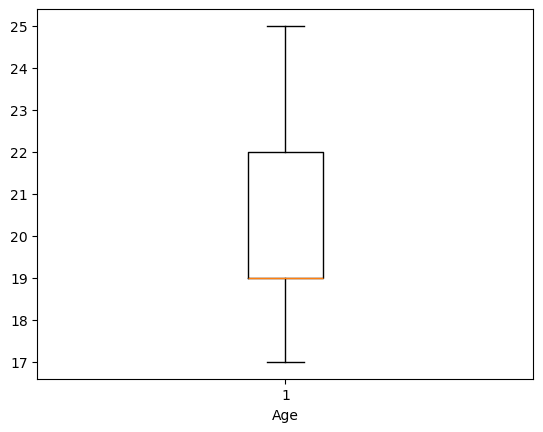

In [153]:
outlier = plt.boxplot(monthly_expense['age'])
outlier_d = outlier['fliers'][0].get_ydata()
plt.xlabel('Age')

plt.show()

# Market Data: Calculations

In [ ]:
# export new, cleaned dataset to interim data folder
with open("../data/processed/2024marketdata.csv", 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(market_df)

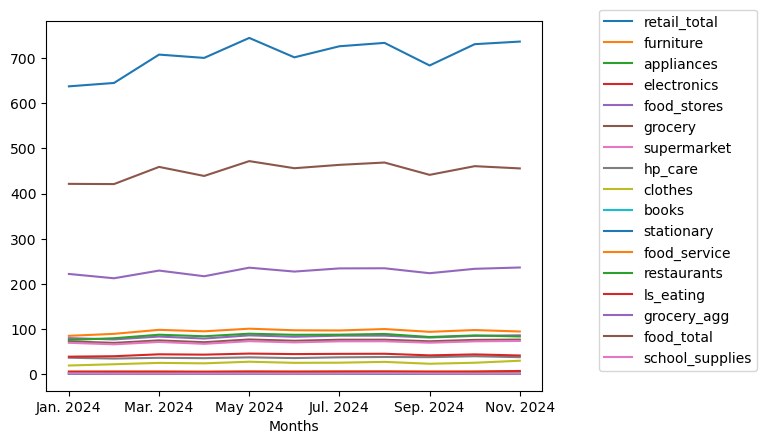

In [106]:
for col in market_df.columns[1:]:
    x = range(1, 12)
    y = market_df[col][0:11]/1000
    plt.plot(x, y, label = col)
    plt.xlabel("Months")
    plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
    plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

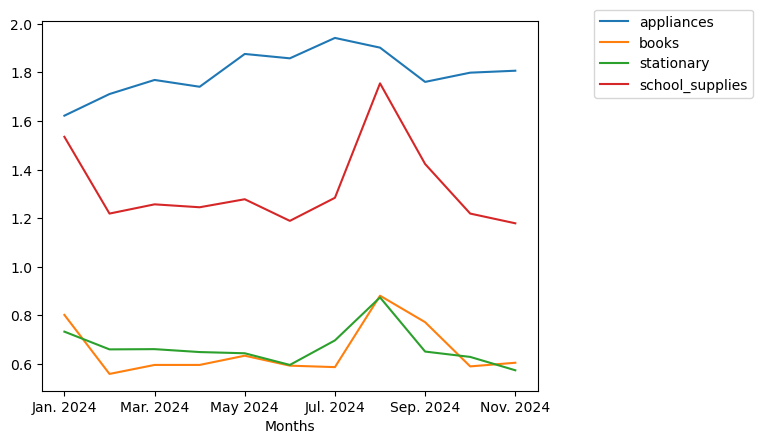

In [109]:
for col in market_df.columns[1:]:
    if np.mean(market_df[col]) < 10000:
        x = range(1, 12)
        y = market_df[col][0:11]/1000
        plt.plot(x, y, label = col)
        plt.xlabel("Months")
        plt.xticks(range(1, 12, 2), market_df.month[0:11:2])
        plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [85]:
market_df['restaurants'].sort_values(ascending = False)[:2]

12    1018716
13     965118
Name: restaurants, dtype: int64